# 0. Introduction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt;import numpy as np;import pandas as pd;import seaborn as sns;sns.set_context("notebook", font_scale=1.4);sns.set_style("whitegrid");import imp;compomics_import = imp.load_source('compomics_import', '../compomics_import.py');from IPython.core.display import HTML;css_file = '../my.css';HTML(open(css_file, "r").read())

Allow me to introduce Peter. Peter works for a pharmaceutical company and he is asked to construct an instrument for the diagnosis of pigmented skin lesions from dermoscopic images such as these:

<br/>
![examples of pigmented skin lesionson](pigments1.jpg)
<br/>
<br/>


The images on the top row exhibit a sign of cancer. These lesions are termed malignant. The images on the bottom row are not cancerous or malignant. These lesions are termed benign. Nevertheless, all images look very much alike. The purpose of the instrument is to process such a dermoscopic image of a patient and classify it as either containing malignant or benign lesions. Peter takes a piece of paper and starts drawing a diagram:

<br/>
![diagram](diagram1.jpg)
<br/>
<br/>


The input of his system is a raw dermoscopic image of a lesion that is interpreted by the instrument
in some way allowing for an accurate diagnosis. For this, Peter programs a **feature extraction** unit that implements methods for image segmentation and object recognition to extract certain measurements from an image that are related to the shape, colors and texture of the lesions.

All these measurements are properties (termed **features** or **attributes**) of an image which are potentially useful for making a correct diagnosis. Given that there truly are differences between benign and malignant lesions, we view them as having different models. Simply stated this means that they can be described differently and that the differences in the description can be used to make a correct diagnosis. However, as the dermoscopic images suggest both models (benign and malignant) seem very similar. 

Peter is searching for those features that explain the differences between the model of a benign and the model of a malignant lesion with sufficient diagnostic accuracy. In his search for these **discriminative features**, Peter collects a set of images of known malignant lesions and known benign lesions. We will refer to this image collection as the melanoma **data set**. Each image in the data set is called a **sample** (or **example** or **instance** or **data point**) and is **labeled** as either malignant or benign.

After studying the images and discussing his observations with experts, Peter considers the ellipse eccentricity of the lesion (how circular the lesion is) in the image as a potential discriminative feature. So Peter programs the feature extraction unit such that it computes an eccentricity value for each image in the data set. This creates a **data matrix** (usually also called a data set) with one column for the feature "Eccentricity" and one for the label of the images.

Let's load this data matrix. We read the tab-separated file *eccentricity.csv* in a python pandas DataFrame. This DataFrame has a function `head()` that shows the first rows of the data set. It also has a property `shape` that contains the dimensions of the data set:

In [2]:
dataset_ecc = pd.read_csv("eccentricity.csv",sep='\t')
print "First 5 data points:"
dataset_ecc.head()

First 5 data points:


,Eccentricity,label
0,1.770190,1
1,0.952262,0
2,1.726489,1
3,0.344707,0
4,-0.138108,0


The data set contains 100 data points. Each point is represented by the 2 columns: the feature 'Eccentricity' and the label 'label'. The label '1' refers to malignant cells and is typically called to **positive class** while the label '0' refers to benign cells and is typically called to **negative class**. 

Peter’s ﬁrst proposition for a model of a malignant cell is: malignant cells have some typical ellipse eccentricity, and this eccentricity is different from the eccentricity of benign cells. He plots his data as two density histogram graphs: a blue one for malignant cells and a green one for benign cells. From his data set Peter observes that this eccentricity is typically larger for malignant cells:

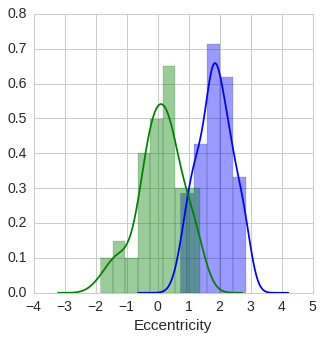

In [3]:
plt.figure(figsize=(5,5))
#call seaborn to plot a distribution plot in blue
sns.distplot(dataset_ecc[dataset_ecc.label==1]['Eccentricity'], color="b")
#call seaborn to plot a distribution plot in green
sns.distplot(dataset_ecc[dataset_ecc.label==0]['Eccentricity'], color="g")
plt.show()

The classiﬁer unit in Peter’s schema can use this feature to perform a classiﬁcation (diagnosis) by checking whether or not the ellipse eccentricity of a lesion is larger than some threshold value $t$, in case the diagnosis is 'malignant'. Peter decides to set $t = 1$:

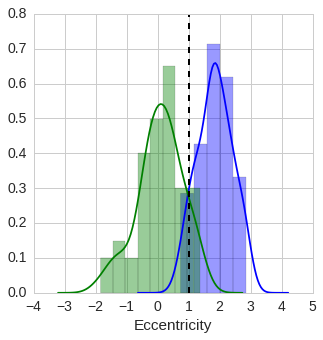

In [4]:
plt.figure(figsize=(5,5))
t=1
sns.distplot(dataset_ecc[dataset_ecc.label==1]['Eccentricity'], color="b")
sns.distplot(dataset_ecc[dataset_ecc.label==0]['Eccentricity'], color="g")
#draw a vertical line at x=t
plt.axvline(t, color='black', linestyle='dashed', linewidth=2)
plt.show()

So far Peter assumed that the **consequence of the predictions** made by the instrument are equally costly: classifying an image of malignant cells as benign was just as undesirable as the converse. It is clear that for Peter’s instrument
classifying an image of malignant cells as benign is far more dramatic than classifying an image of benign cells as malignant. 

Peter could take this into account by adjusting the threshold value to $t = 0.7$. Thereby reducing the number of malignant images that are classiﬁed as benign in his data set, but increasing the number of benign images that are diagnosed as malignant:

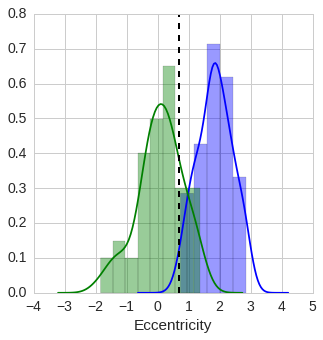

In [5]:
plt.figure(figsize=(5,5))
t = 0.7
sns.distplot(dataset_ecc[dataset_ecc.label==1]['Eccentricity'], color="b")
sns.distplot(dataset_ecc[dataset_ecc.label==0]['Eccentricity'], color="g")
plt.axvline(t, color='black', linestyle='dashed', linewidth=2)
plt.show()

Such considerations suggest that there is an overall single cost associated with the decision and Peter’s true task
is to make a **decision rule**, or set a **decision boundary** so as to minimize the specified cost.

For classification tasks these considerations are deduced from a **confusion matrix**. This matrix is a way of visualizing the types of predictions made by a classification model. For Peter's data set we say the malignant images belong to the **positive** class, the benign images belong to the **negative** class. 

Given the classification threshold $t$ we can count the number of malignant images with eccentricity value $\ge t$. These are called the **true positive** predictions (TP) as the prediction 'malignant' is correct. Those malignant images with eccentricity value $<t$ are called the **false negative** predictions (FN) as the prediction 'benign' is incorrect. 

Similarly, benign images with eccentricity value $\ge t$ are called **false positive** predictions (FP) as the prediction 'malignant' is incorrect. Those benign images with eccentricity value $<t$ are the **true negative** predictions (TN) as the prediction 'benign' is correct. So, Peter has set $t=0.7$ to avoid FN predictions.

In summary:

- count the number of malignant images with eccentricity value $\ge t$: **true positive** predictions (TP)

- count the number of malignant images with eccentricity value $<t$: **false negative** predictions (FN)

- count the number of benign images with eccentricity value $\ge t$: **false positive** predictions (FP)

- count the number of benign images with eccentricity value $<t$: **true negative** predictions (TN)

The different types of predictions are usually represented in a **confusion matrix**. In scikit-learn there is a function called `confusion_matrix()` that computes the confusion matrix from true and predicted values:

In [6]:
from sklearn import metrics

t=0.7
predictions = [1 if x >= t else 0 for x in dataset_ecc['Eccentricity']]

cm = metrics.confusion_matrix(dataset_ecc['label'],predictions)
print "Confusion matrix computed by scikit-learn:\n"
print cm
print
print "#TP = %i" % cm[0][0]
print "#FP = %i" % cm[1][0]
print "#FN = %i" % cm[0][1]
print "#TN = %i" % cm[1][1]

Confusion matrix computed by scikit-learn:

[[40 10]
 [ 0 50]]

#TP = 40
#FP = 0
#FN = 10
#TN = 50


From this confusion marix we can compute the **accuracy** on the test set for a specific value for $t$ as 

$$\text{accuracy}=\frac{TP+TN}{TP+FP+TN+FN}.$$

Many other classification **evaluation metrics** exist. One that is used very often is **AUC (area under the a receiver operating characteristic (ROC) curve)**. This evaluation metric is computed from a curve constructed by varying the decision threshold $t$ and computing the metrics **true positive rate** (TPR) and the **false positive rate** (FPR). The TPR is computed as 

$$\text{TPR}=\frac{TP}{TP+FN},$$

and asks "of all the malignant images how many are classified correctly?". The FPR is is computed as 

$$\text{FPR}=\frac{FP}{FP+TN},$$

and asks "of all the benign images how many are classified incorrectly as malignant?".

Similary we can defined the **true negative rate** as 

$$\text{TNR}=\frac{TN}{TN+FP},$$

and the **false negative rate** as

$$\text{FNR}=\frac{FN}{FN+TP}.$$

Now consider a model that classifies all images as malignant. In this case the TPR=1 while FPR=1 also. A model that classifies all images a benign has TPR=0 and FPR=0. For more accurate classification models there will be a balance between TPR and FPR controlled by the value of $t$. By varying $t$ we obtain different values for TPR and FPR which we can plot as what is known as the ROC curve:

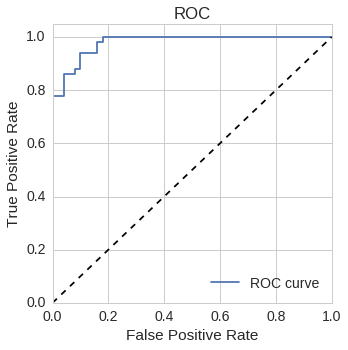

In [7]:
fpr, tpr, thresholds = metrics.roc_curve(dataset_ecc['label'], dataset_ecc['Eccentricity'], pos_label=1)

plt.figure(figsize=(5,5))
compomics_import.plot_ROC(fpr,tpr)
plt.show()

The area under this ROC curve (AUC) is a decision threshold independent metric for classification performance. In scikit-learn it can be computed as follows:

In [8]:
print metrics.roc_auc_score(dataset_ecc['label'], dataset_ecc['Eccentricity'])

0.9792


The area under this ROC curve (AUC) is a decision threshold independent metric for classification performance. The higher AUC the better the performance of the model. Peter can use the ROC curve to decide on the optimal value for $t$. Let's say Peter selects $t=0.7$. Although the decision rule
 
"IF  $t >= 0.7$ THEN diagnosis is malignant"

classiﬁes images much better than random, Peter is not totally satisﬁed by its performance. He could search for an even more discriminative feature. But suppose no other feature exist that is more distinctive. 

To improve classiﬁcation performance Peter must resort to the use of **more than one feature** at a time, known as **multivariate analysis**. He adds a means to quantify the solidity of a lesion from an image to the feature extraction unit and creates a new data matrix with two features:

In [9]:
#Load csv file into python variable
dataset_mel = pd.read_csv("melanoma.csv",sep='\t')
print dataset_mel.head()
print 
print "shape of data matrix:"
print dataset_mel.shape

   Eccentricity  Solidity  label
0     -0.598720 -2.863001      0
1     -0.518611  0.126108      0
2     -1.843886 -2.163015      0
3     -0.289294 -1.502928      0
4     -1.177039 -2.112436      0

shape of data matrix:
(600, 3)


Let's look at how the feature 'Solidity' discriminates the classes:

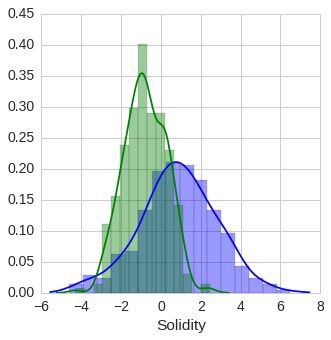

In [10]:
plt.figure(figsize=(5,5))
sns.distplot(dataset_mel[dataset_mel['label']==1]['Solidity'], color="b")
sns.distplot(dataset_mel[dataset_mel['label']==0]['Solidity'], color="g")
plt.show()

The feature extraction unit has reduced each image of cells to a vector of features (or **feature vector**)
$x$ with two dimensions. All the images in Peter’s data set can thus be represented by such a feature vector that can be plotted in a vector space:

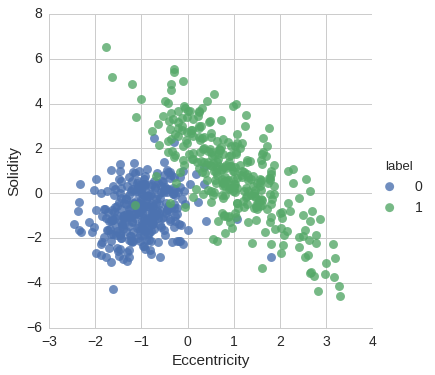

In [11]:
sns.lmplot(x="Eccentricity", y="Solidity", data=dataset_mel, hue='label', 
           fit_reg=False, size=5.5, scatter_kws={"s": 80})
plt.show()

Peter’s task now is to partition this space into two regions such that all points in one region are classiﬁed as malignant (green) and all points in the other region as benign (blue). Peter could compute a **linear decision boundary**:

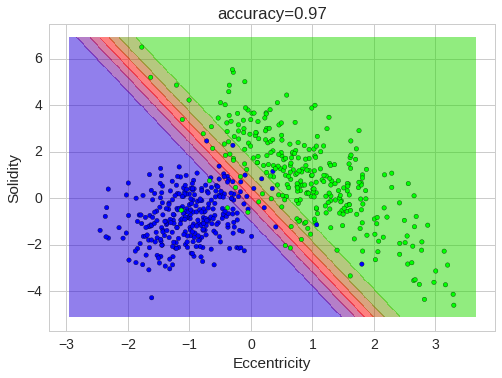

In [12]:
from sklearn.svm import SVC

X = dataset_mel[['Eccentricity','Solidity']]
y = dataset_mel['label']

model =  SVC(kernel="linear",C=1,probability=True)
model.fit(X, y)

compomics_import.plot_decision_boundary(model,X,y)
plt.show()

This plot suggests the following rule for separating the images: classify the image as malignant if its feature vector
is located in the green zone, and as benign otherwise. This rule appears to do a good job of separating the images in Peter’s data set and suggests that perhaps incorporating **yet more features** would be desirable. But when Peter uses more than three features he can't visualize the decision boundary anymore. How can Peter quantify how good a certain set of features allows for a correct diagnosis if he can’t look at the decision boundary? Also, even if the difﬁculty or computational cost in attaining more features is of no concern, might Peter ever have **too many features**? Could adding more features decrease the classiﬁcation performance of his instrument?

Suppose that other features are too expensive to measure, or provide little improvement, or even degrade the performance, and that Peter is forced to implement a classiﬁer unit based on the two features. If the models of benign and malignant cells were extremely complicated, the classiﬁer could have a decision boundary **more complex** than a simple straight line. For instance by using a decision boundary based on a decision tree:

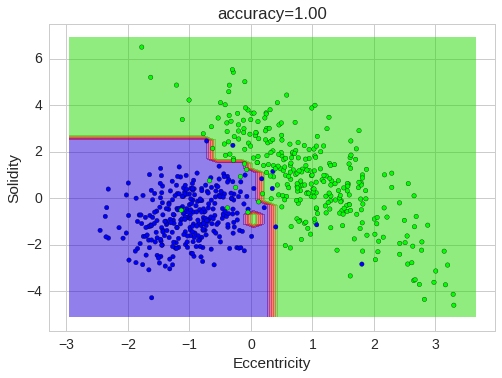

In [13]:
from sklearn.tree import DecisionTreeClassifier

model =  DecisionTreeClassifier(max_depth=1000,random_state=0)
model.fit(X, y)
compomics_import.plot_decision_boundary(model,X,y)
plt.show()

So which decision boundary is best? The **central aim** of designing the instrument is to classify **unseen external** images that were not in Peter’s data set. This is the concept of **generalization**. It is unlikely that this complex decision tree data separation will provide good *generalization*, since it seems to be ‘ﬁtted’ too well to Peter’s data set, rather than some underlying characteristics or true model of malignant and benign cells. This is known as **overfitting** and signiﬁcantly complicates the construction of the classiﬁer unit in Peter’s instrument.

Naturally, a possible approach would be for Peter to ﬁnd more images for his data set to obtain a better estimate of the true underlying characteristics. However, the images he has in his data set were validated by experts one at a time and important issues such as 'no time' and 'no money' arise. Rather, he might seek to ‘simplify’ the recognizer motivated by a belief that the underlying models will not require a to complex decision boundary. Indeed, he might be satisﬁed with the slightly poorer data set performance of the simpler linear boundary, if that means that the classiﬁer will have better performance on novel images. 

So far we have seen many very important elements of machine learning. The following chapters will describe these in much more detail. But before we continue we should introduce two other important topics.

The first one is the **normalization** (**scaling** or **standardization**) of the feature values. The idea is to get all the features you collect on the same (or similar) scale: if the scales for different features are wildly different then this can have a knock-on effect on your ability to learn. For instance, if the feature 'Eccentricity' would have values within [0,100] while the values for 'Solidity' are within [-5,7] then we could see 'Eccentricity' as more important then 'Solidity' while this is not the case. Ensuring normalized feature values implicitly weights all features equally in their representation. Here for instance we see a data set with 20 features (gene expression measurements) that are clearly at different scales:

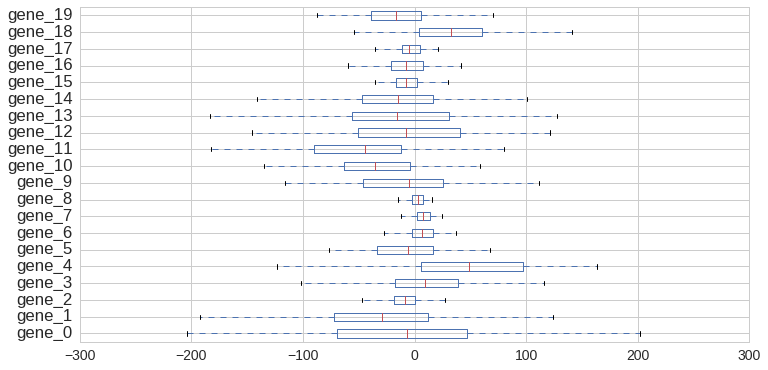

In [14]:
dataset_unscaled = pd.read_csv('unscaled_dataset.csv',sep=',')
plt.figure(figsize=(12,6))
dataset_unscaled.boxplot(vert=False)
plt.show()

Notice how the scale of the expression values differs significantly between the features (genes). 

**Standardization** (or **Z-score normalization**) scales the features such that they'll have the properties of a standard normal distribution (mean $\mu = 0$ and standard deviation $\sigma = 1$):

\begin{equation} x_{norm} = \frac{x - \mu}{\sigma}.\end{equation} 

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Here all the features are standardized:

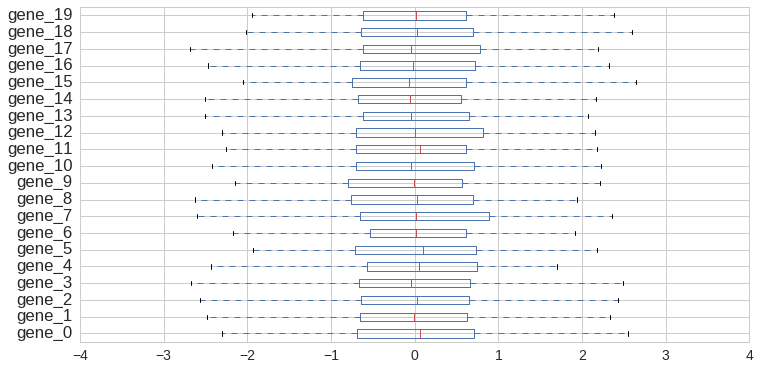

In [15]:
from sklearn.preprocessing import StandardScaler

dataset_unscaled_cols = dataset_unscaled.columns.values
scaler = StandardScaler()
scaler.fit(dataset_unscaled)
dataset_stand = pd.DataFrame(scaler.transform(dataset_unscaled),columns=dataset_unscaled_cols)
plt.figure(figsize=(12,6))
dataset_stand.boxplot(vert=False)
plt.show()

Another popular approach is to scale the features to a fixed range, usually 0 to 1. This is known as **min-max scaling** and is computed as

\begin{equation} x_{norm} = \frac{x - x_{min}}{x_{max}-x_{min}}, \end{equation}

where $x_{min}$ and $x_{max}$ are the minimum and maximum value for $x$ respectively. Here we perform min-max scaling of the features in the original data set:

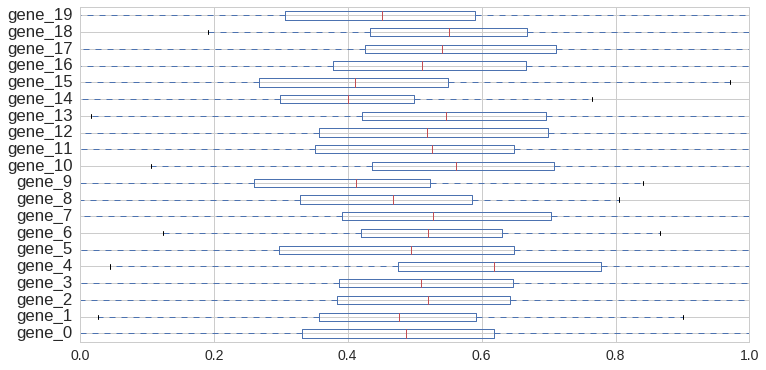

In [16]:
from sklearn.preprocessing import MinMaxScaler

dataset_unscaled_cols = dataset_unscaled.columns.values
scaler = MinMaxScaler()
scaler.fit(dataset_unscaled)
dataset_norm = pd.DataFrame(scaler.transform(dataset_unscaled),columns=dataset_unscaled_cols)
plt.figure(figsize=(12,6))
dataset_norm.boxplot(vert=False)
plt.show()

The second topic concerns the different types of features. So far we have seen **continuous** features for which the values are ordered numerically and equally spaced. These are typically obtained from measurements. There exist also **categorical** features for which the values are not ordered. For instance the values 'green', 'red' and 'yellow' for a feature that represents color. In between there exists also the **ordinal** feature. Such a feature is ordered, but the spacing is not necessarily uniform (and usually unknown). These are for instance obtained from questionnaires such as the values 'very bad', 'bad', 'good' and 'very good' for a feature that measures opinion.

<strong>Exercise</strong>

- What is the AUC for the feature "Solidity" in the data set "dataset_mel"?